In [1]:
# test ak
import akshare as ak

df = ak.fund_etf_spot_em().sort_values(by="基金折价率", ascending=False).head(20)

df.to_csv("./data/etf20.csv", index=False, encoding="utf-8-sig")


  0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
# get and save gold price data

import akshare as ak

spot_hist_sge_df = ak.spot_hist_sge(symbol='Au99.99')

spot_hist_sge_df.to_csv("./data/gold.csv", index=False, encoding="utf-8-sig")



Date from 2016 to 2025
Total years: 10
Total invested: ¥100000.00
Portfolio value: ¥180134.27
Profit: ¥80134.27 (8.01%)


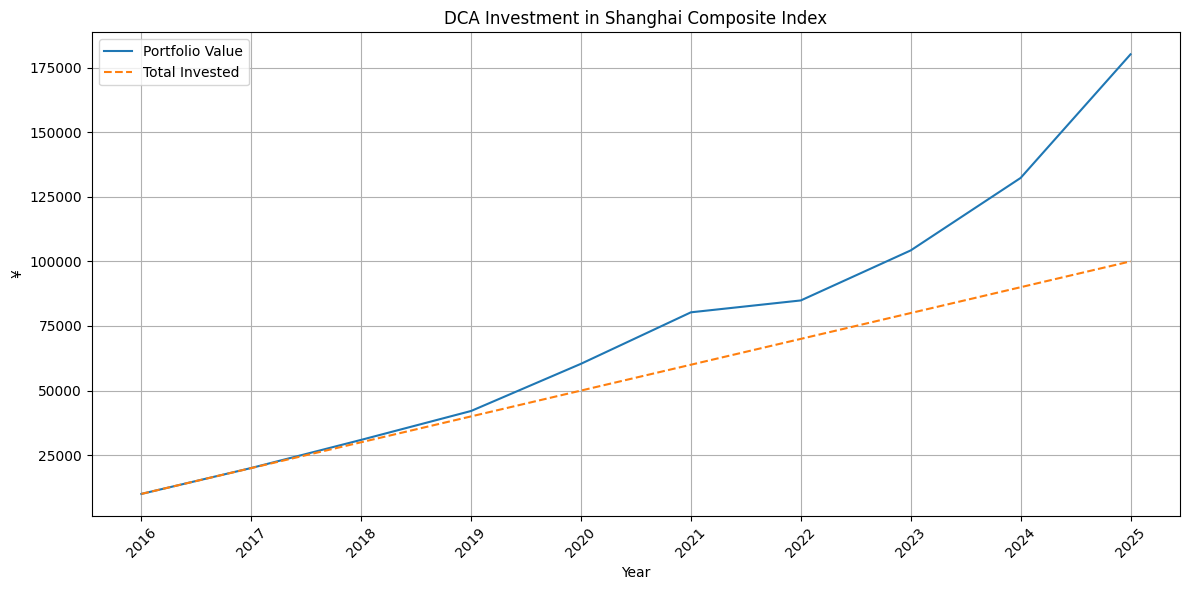

In [1]:
# Gold DCA
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("./data/gold.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Extract year for grouping
df['year'] = df['date'].dt.to_period('Y')

# Get the first trading day of each year
yearly_df = df.groupby('year').first().reset_index()


# DCA logic
investment_per_month = 10000  # ¥12000 per month
yearly_df['shares_bought'] = investment_per_month / yearly_df['close']
yearly_df['total_shares'] = yearly_df['shares_bought'].cumsum()
yearly_df['total_invested'] = investment_per_month * (yearly_df.index + 1)

# Use latest price to calculate current value
# latest_price = df['close'].iloc[-1]
yearly_df['portfolio_value'] = yearly_df['total_shares'] * yearly_df['close']

# Final result
total_invested = yearly_df['total_invested'].iloc[-1]
portfolio_value = yearly_df['portfolio_value'].iloc[-1]
profit = portfolio_value - total_invested
total_year = yearly_df['year'].size

print(f"Date from {yearly_df['year'][0]} to {yearly_df['year'].iloc[-1]}")
print(f"Total years: {total_year}")
print(f"Total invested: ¥{total_invested:.2f}")
print(f"Portfolio value: ¥{portfolio_value:.2f}")
print(f"Profit: ¥{profit:.2f} ({profit / total_invested / total_year:.2%})")

# Save to CSV
yearly_df.to_csv("./data/gold_years.csv", index=False, encoding="utf-8-sig")
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_df['year'].astype(str), yearly_df['portfolio_value'], label='Portfolio Value')
plt.plot(yearly_df['year'].astype(str), yearly_df['total_invested'], label='Total Invested', linestyle='--')
plt.title("DCA Investment in Shanghai Composite Index")
plt.xlabel("Year")
plt.ylabel("¥")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [5]:
# AKShare usage
import akshare as ak    
import pandas as pd
start_date = "20110101"
final_df = pd.DataFrame()

for i in range(0, 14):
    start = pd.to_datetime(start_date)
    end = start + pd.DateOffset(years=1)
    end_date = end.strftime("%Y%m%d")
    print(f"Start date: {start_date}, End date: {end_date}")
    bond_china_yield_df = ak.bond_china_yield(start_date=start_date, end_date=end_date)
    # print(bond_china_yield_df)
    aaa = bond_china_yield_df[bond_china_yield_df['曲线名称'] == '中债中短期票据收益率曲线(AAA)']
    aaa.to_csv('./data/aaa.csv', index=False, encoding='utf-8-sig', mode='a', header=False)
    # print(final_df)
    start_date = end_date



print(final_df)

Start date: 20110101, End date: 20120101
Start date: 20120101, End date: 20130101
Start date: 20130101, End date: 20140101
Start date: 20140101, End date: 20150101
Start date: 20150101, End date: 20160101
Start date: 20160101, End date: 20170101
Start date: 20170101, End date: 20180101
Start date: 20180101, End date: 20190101
Start date: 20190101, End date: 20200101
Start date: 20200101, End date: 20210101
Start date: 20210101, End date: 20220101
Start date: 20220101, End date: 20230101
Start date: 20230101, End date: 20240101
Start date: 20240101, End date: 20250101
Empty DataFrame
Columns: []
Index: []


In [4]:
import akshare as ak

nlp_answer_df = ak.nlp_answer(question="姚明的身高")
print(nlp_answer_df)

姚明的身高为**2米26**。


In [3]:
import akshare as ak

qdii_e_index_jsl_df = ak.qdii_e_index_jsl()
qdii_e_index_jsl_df.to_csv("./data/qdii.csv", index=False, encoding="utf-8-sig")
print(qdii_e_index_jsl_df)

        代码            名称     现价      涨幅         成交     场内份额  场内新增   T-2净值  \
0   159529       标普消费ETF  1.600   4.17%  168904.95    40354     0  1.2484   
1   159612      标普500ETF  1.827   3.40%  133112.68    34690     0  1.5730   
2   513030         德国ETF  1.847   1.71%  235970.00    72978     0  1.7652   
3   159822        新经济ETF  0.702  -3.44%  141014.65    64613  3000  0.6847   
4   159509       纳指科技ETF  1.526  -0.26%   92237.17   633856   100  1.4923   
5   159941         纳指ETF  1.178   0.34%   73657.27  2181171   130  1.1563   
6   513100         纳指ETF  1.563   0.26%   35519.73   949911     0  1.5370   
7   513290     纳指生物科技ETF  1.063   1.92%    9103.32   113507     0  1.0296   
8   159632       纳斯达克ETF  1.753   0.34%   11678.07   537772     0  1.7435   
9   159561         德国ETF  1.304   1.16%   33701.08   116650  2000  1.2872   
10  513300       纳斯达克ETF  1.927  -0.16%   47814.35   467317  3750  1.9211   
11  501300        美元债LOF  0.966   0.10%     970.47    85363    54  0.9590   

In [2]:
import akshare as ak

qdii_a_index_jsl_df = ak.qdii_a_index_jsl()
qdii_a_index_jsl_df.to_csv("./data/qdii_a.csv", index=False, encoding="utf-8-sig")
print(qdii_a_index_jsl_df)

         代码         名称     现价      涨幅        成交    场内份额  场内新增      净值  \
0    161124    港股小盘LOF  0.978  -0.10%  26883.20   17810   -27  0.9568   
1    513630  港股红利指数ETF  1.380  -0.36%  11543.16  753636  3600  1.3834   
2    159570  港股通创新药ETF  1.230   3.27%  50998.02  263060  1600  1.1881   
3    159866      日经ETF  1.087   0.00%   2541.96   61998    50  1.0777   
4    513190   港股通金融ETF  1.510  -0.85%   3991.80   54694  2900  1.5188   
..      ...        ...    ...     ...       ...     ...   ...     ...   
118  513830    港股红利ETF  1.041  -0.29%   1146.59   33031 -2000  1.0497   
119  513810    港股国企ETF  1.434  -0.69%    593.21    6599     0  1.4493   
120  159892    恒生医药ETF  0.607   2.36%  62099.73  686227 -5000  0.5972   
121  501303   恒生中型股LOF  0.905   0.00%    512.04    6471  -136  0.9126   
122  513800  日本东证指数ETF  1.449   0.14%    629.16   59424     0  1.4415   

           净值日期      估值     溢价率      相关标的    指数涨幅    申购费    赎回费   托管费  基金公司  
0    2025-05-15  0.9549   2.42%     恒生小型股  -0

In [1]:
import akshare as ak

cost_living_df = ak.cost_living(symbol="world")
cost_living_df.to_csv("./data/cost_living.csv", index=False, encoding="utf-8-sig")
print(cost_living_df)

      rank                                       city  index
0      1st              New York City (United States)    297
1      2nd                    London (United Kingdom)    233
2      3rd              Grand Cayman (Cayman Islands)    223
3      4th  San Francisco, California (United States)    213
4      5th                       Zurich (Switzerland)    210
..     ...                                        ...    ...
138  139th            Zenica (Bosnia and Herzegovina)     50
139  140th                          Bangalore (India)     50
140  141st                         Dhaka (Bangladesh)     45
141  142nd                              Cairo (Egypt)     41
142  143rd                     Yogyakarta (Indonesia)     35

[143 rows x 3 columns]


In [7]:
# '520580.SZ'
import akshare as ak

stock_zh_a_hist_df = ak.stock_zh_a_hist(symbol="513730.SH", period="daily", start_date="20230301", end_date='20240528', adjust="")
print(stock_zh_a_hist_df)

ak.stock_zh_a_spot().to_csv("./data/code.csv", index=False, encoding="utf-8-sig")

Empty DataFrame
Columns: []
Index: []


Please wait for a moment:   0%|          | 0/68 [00:00<?, ?it/s]

In [9]:
import akshare as ak

fund_etf_spot_em_df = ak.fund_etf_spot_em()
print(fund_etf_spot_em_df)
fund_etf_spot_em_df.to_csv("./data/etf.csv", index=False, encoding="utf-8-sig")

  0%|          | 0/11 [00:00<?, ?it/s]

          代码            名称    最新价  IOPV实时估值  基金折价率    涨跌额    涨跌幅         成交量  \
0     159529       标普消费ETF  1.592    1.2564 -26.71  0.056   3.65  29212869.0   
1     560520  红利低波100ETF基金  1.115    1.0747  -3.75  0.035   3.24      2831.0   
2     159567      港股创新药ETF  1.215    1.2141  -0.07  0.031   2.62   5902108.0   
3     513030         德国ETF  1.859    1.7825  -4.29  0.043   2.37  15385710.0   
4     159570     港股通创新药ETF  1.219    1.2156  -0.28  0.028   2.35   6907113.0   
...      ...           ...    ...       ...    ...    ...    ...         ...   
1130  562030       信创ETF基金  0.948    0.9471  -0.10 -0.014  -1.46    118482.0   
1131  512970        大湾区ETF  1.200    1.1981  -0.16 -0.028  -2.28     17691.0   
1132  159822        新经济ETF  0.698    0.6786  -2.86 -0.029  -3.99  24418997.0   
1133  159371      创50ETF富国  0.949    0.9479  -0.12 -0.049  -4.91     46709.0   
1134  159542       工程机械ETF  1.170    1.1522  -1.54 -0.130 -10.00     14535.0   

               成交额    开盘价  ...    小单净流入

In [11]:
import akshare as ak

fund_etf_fund_info_em_df = ak.fund_etf_fund_info_em(fund="511280", start_date="20240101", end_date="20250101")
print(fund_etf_fund_info_em_df)

0it [00:00, ?it/s]

ValueError: No objects to concatenate